# Analyze target statistics

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
pd.options.display.float_format = '{:.3f}'.format
plt.rcParams["figure.dpi"] = 150
sns.set(style='darkgrid')
from IPython.display import display
import warnings
warnings.simplefilter('ignore', UserWarning)
from pathlib import Path
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams["font.size"] = 15
plt.rcParams['figure.figsize'] = (6, 4)

In [2]:
# Read target csv
subset_name = 'target_subset_' + Path('.').resolve().name
df = pd.read_csv(f'../../../../data/interim/{subset_name}.csv', index_col=0)
df

,id,resolution,releasedate,header,sequence,length,num_entry_in_cluster,num_entry_in_cluster_AF2_notInclude,is_similar_AF2
0,6AN4_A,1.470,2019-04-17T00:00:00Z,>6an4_A mol:protein length:158 2-amino-4-hydr...,TVAYIAIGSNLASPLEQVNAALKALGDIPESHILTVSSFYRTPPLG...,158,90,5,True
1,5ZHE_A,2.180,2021-03-03T00:00:00Z,">5zhe_A mol:protein length:253 Ditrans,polyci...",MMLSATQPLSEKLPAHGCRHVAIIMDGNGRWAKKQGKIRAFGHKAG...,253,52,2,True
2,6DCR_A,1.980,2019-04-17T00:00:00Z,>6dcr_A mol:protein length:694 Primosomal pro...,MGSSHHHHHHSSGLVPRGSHMPVAHVALPVPLPRTFDYLLPEGMTV...,694,8,4,True
3,6D57_A,1.810,2019-04-24T00:00:00Z,>6d57_A mol:protein length:161 Ferric uptake ...,GAMGMLIENVEYDVLLERFKKILRQGGLKYTKQREVLLKTLYHSDT...,161,4,2,True
4,5ZCT_A,2.050,2019-03-27T00:00:00Z,>5zct_A mol:protein length:306 Ribosomal prot...,MKIAILSRDGTLYSCKRLREAAIQRGHLVEILDPLSCYMNINPAAS...,306,11,9,True
...,...,...,...,...,...,...,...,...,...
295,6SRN_A,1.500,2020-03-04T00:00:00Z,>6srn_A mol:protein length:214 TetR family tr...,MTSAQQPTPFAVRSNVPRGPHPQQERSIKTRAQILEAASEIFASRG...,214,2,2,False
296,7NUU_A,1.840,2020-09-30T00:00:00Z,>7nuu_A mol:protein length:409 N-acetylglucos...,MRGEQGAAGARVLQFTNCRILRGGKLLREDLWVRGGRILDPEKLFF...,409,4,4,False
297,7P2J_A,1.985,2019-06-12T00:00:00Z,>7p2j_A mol:protein length:114 Fucose-binding...,SSEIAALKQEIAALKKEIAALKAGASVQTAATSWGTVPSIRVYTAN...,114,10,10,False
298,6KZ7_B,2.283,2019-06-19T00:00:00Z,>6kz7_B mol:protein length:82 SWI/SNF-related...,HDPAVIHENASQPEVLVPIRLDMEIDGQKLRDAFTWNMNEKLMTPE...,82,3,3,False


In [3]:
df['is_similar_AF2'] = ['True' if x == True else 'False' for x in df['is_similar_AF2']]

In [4]:
# Number of sequences included in the AF2 training data in the cluster
df['num_sequence_in_cluster_included_AF2'] = df['num_entry_in_cluster'] - df['num_entry_in_cluster_AF2_notInclude']

## Show target distribution

<AxesSubplot:xlabel='length'>

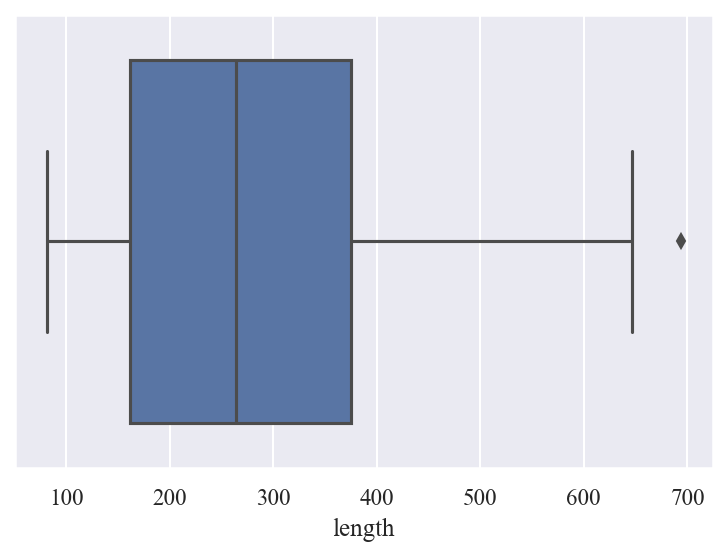

In [5]:
# Sequence length
sns.boxplot(data=df, x='length')

<AxesSubplot:xlabel='length', ylabel='is_similar_AF2'>

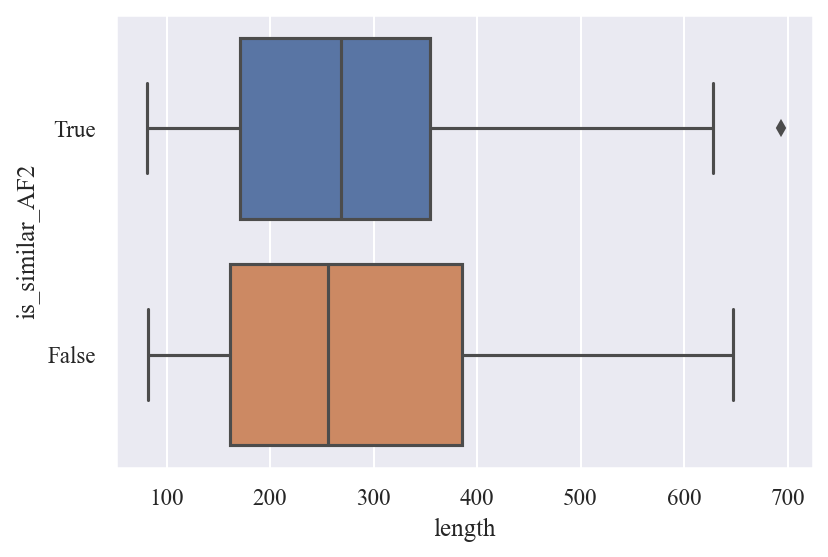

In [6]:
sns.boxplot(data=df, x='length', y='is_similar_AF2')

<AxesSubplot:xlabel='resolution'>

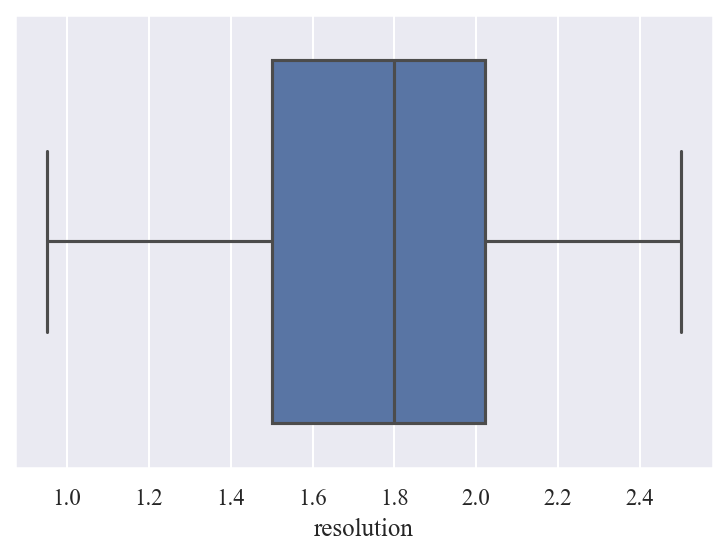

In [7]:
# Resolution
sns.boxplot(data=df, x='resolution')

<AxesSubplot:xlabel='resolution', ylabel='is_similar_AF2'>

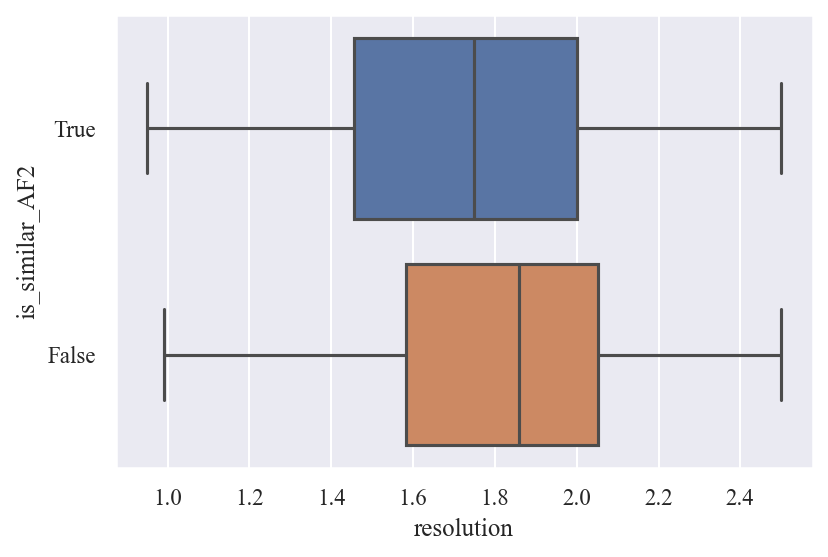

In [8]:
sns.boxplot(data=df, x='resolution', y='is_similar_AF2')

<AxesSubplot:xlabel='is_similar_AF2', ylabel='count'>

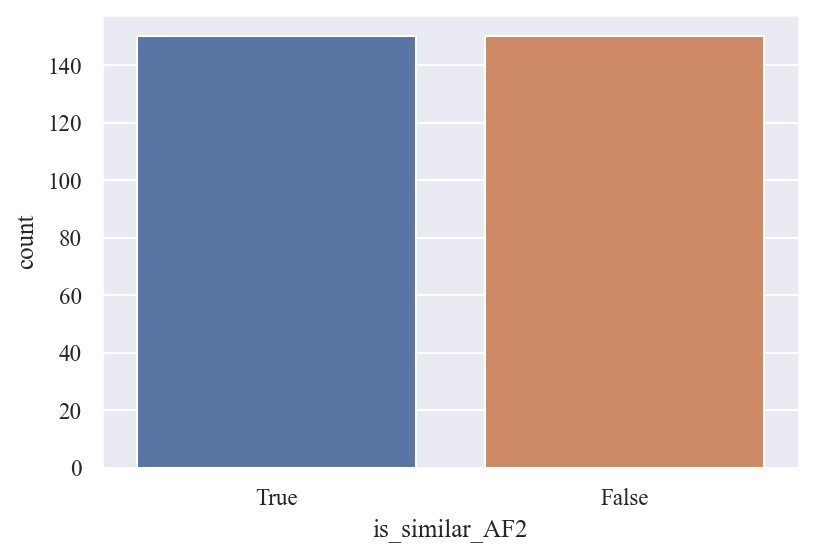

In [9]:
# Target number that have similar sequence to AF2 training dataset and not
sns.countplot(data=df, x='is_similar_AF2')

/Users/TAKEI/miniforge3/envs/mypython/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='num_entry_in_cluster'>

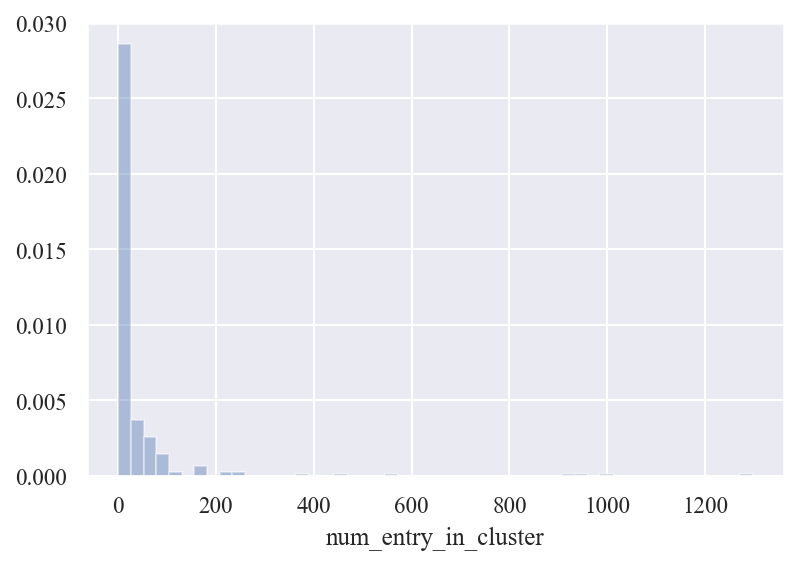

In [10]:
sns.distplot(df['num_entry_in_cluster'], kde=False, norm_hist=True)

<AxesSubplot:xlabel='num_sequence_in_cluster_included_AF2'>

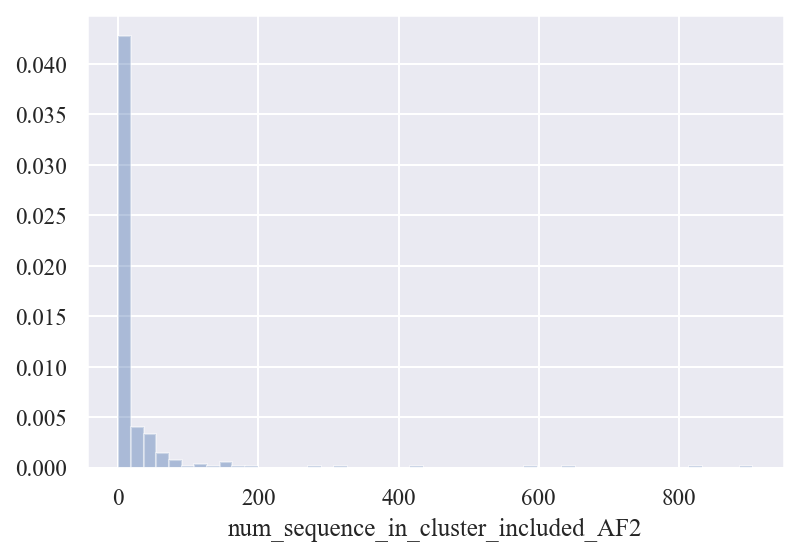

In [11]:
sns.distplot(df['num_sequence_in_cluster_included_AF2'], kde=False, norm_hist=True)